In [1]:
import nengo
import matplotlib.pyplot as plt
import numpy
import gym
import math
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')
new_state = env.reset()
model = nengo.Network()

[2017-09-04 10:23:49,157] Making new env: FrozenLake-v0


In [3]:
def one_hot(location, size):
    one_hot_vector = numpy.zeros(size)
    one_hot_vector[location] = 1
    return one_hot_vector

In [4]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = numpy.exp(x - numpy.max(x))
    return e_x / e_x.sum()
def action_from_softmax(softmax_score):
    random = numpy.random.sample()
    prev_j = 0
    for i, j in enumerate(softmax_score):
        j_total = j + prev_j
        if random < j_total:
            print "i", i
            return i
        prev_j = j
print action_from_softmax(softmax(numpy.array([0.4, 0.6])))

i 1
1


In [72]:
weight = numpy.random.uniform(size=(env.observation_space.n, env.action_space.n))
weight = numpy.zeros((env.observation_space.n, env.action_space.n))

observation = env.reset()
with nengo.Network() as model:
    state_vector = one_hot(observation, env.observation_space.n)
    state_node = nengo.Node(state_vector)
    state = nengo.Ensemble(label="State", n_neurons=1000, dimensions=env.observation_space.n, radius=1)
    nengo.Connection(state_node, state)
    weight[0][2] = 1
    action = nengo.Ensemble(label="Actions", n_neurons=1000, dimensions=env.action_space.n, radius=1)
    for i in range(env.observation_space.n):
        for j in range(env.action_space.n):
            nengo.Connection(state[i], action[j], weight[i][j])
            
    basal_ganglia = nengo.Ensemble(n_neurons=100, dimensions=1, radius=4)
    nengo.Connection(action, basal_ganglia, function=numpy.argmax)
    selected_action = nengo.Probe(basal_ganglia)
    

In [73]:
#Test with simulator and plot
thresold = 0.5
sim = nengo.Simulator(model)
sim.run(0.01)


Building finished in 0:00:18.                                                   
Simulating finished in 0:00:01.                                                 


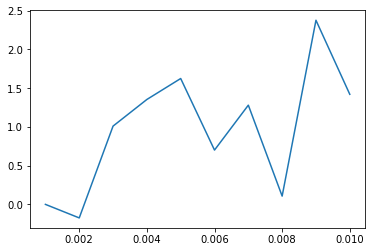

In [74]:
plt.figure()
plt.plot(sim.trange(), sim.data[selected_action])


In [75]:
print (sim.data[selected_action])

[[ 0.        ]
 [-0.17465596]
 [ 1.00949513]
 [ 1.35298583]
 [ 1.62334787]
 [ 0.70028661]
 [ 1.27959519]
 [ 0.1067208 ]
 [ 2.37487444]
 [ 1.41952826]]
